# Valorant Agent Stats in Ascent Map (as of August 2023)
## Introduction
Welcome! In this analysis, I delved into the performance metrics of various agents within the popular tactical shooter game Valorant. My focus lied specifically on the Ascent map, one of the diverse battlegrounds that players engage on. By harnessing data, I aimed to uncover insights into agent performance, playstyle tendencies, and strategic dynamics within this particular environment. By leveraging a comprehensive dataset featuring key metrics for each agent, I intended to provide players and enthusiasts alike with a deeper understanding of how agents perform on Ascent.

## Project Overview
In this data analysis project, I shed light on the performance of Valorant agents on the Ascent map as of August 2023. Valorant, developed by Riot Games, has gained immense popularity for its unique blend of tactical gameplay and character-based abilities. Ascent, a vibrant map characterized by its tight corridors and vertical gameplay, presents distinct challenges and opportunities for players. By analyzing agent statistics such as KDA, win percentage, pick rate, and more, I uncovered patterns and trends that could provide valuable strategic insights for players aiming to excel on this map.

## The Ascent Map
Ascent is a map that offers a balanced mix of open spaces and close-quarter engagements. Its distinct architectural design, featuring urban streets, market squares, and a towering glass skyscraper, creates a unique tactical landscape. The map's verticality adds an extra layer of complexity, requiring agents to adapt their strategies and abilities accordingly. In this analysis, we will explore how agents' performances align with the challenges and dynamics posed by the Ascent map. By examining key statistics in conjunction with the map's layout, I provide a comprehensive understanding of agent strengths and weaknesses within this environment.

## Project Goals
The "Valorant Agent Stats in Ascent Map" analysis had a set of clear goals aimed at providing players and enthusiasts with valuable insights into agent performance and strategies on the Ascent map. The primary objectives of this project were as follows:

**Agent Performance Assessment**: The central goal of this analysis was to evaluate the performance of various Valorant agents on the Ascent map. By examining key metrics such as Kill-Death Ratio (KD), Kill-Death-Assist Ratio (KDA), win percentage, and more, we aimed to identify which agents excelled on this map and understand their playstyle adaptations.

**Strategic Insights**: Through the analysis of agent statistics, we aimed to uncover strategic insights into which agents were more likely to succeed in different areas of the Ascent map. This included assessing whether certain agents' abilities were particularly effective in certain parts of the map, contributing to team dynamics and map control.

**Trends and Patterns**: By identifying trends and patterns in agent performance, we aimed to reveal information about the metagame on the Ascent map. Understanding which agents were popular picks and how their success rates varied helped players make informed decisions about agent selection and gameplay strategies.

Stay tuned to see the data and valuable insights that can enhance your gameplay on Valorant's Ascent map!

## Imported Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [9]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-in-the-ascent-map/Valorant Agent Stats in Ascent Map (as of 08_2023) - Sheet1 (1).csv')

## Gathering Data

I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [10]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches
0,Reyna,1.12,14.6/13.3/3.7,46.60%,9.70%,286,"8,463,561"
20,Astra,1.08,18.3/16.9/4.7,32.10%,1.60%,628,"1,383,484"
1,Jett,1.06,13.9/13.1/3.1,45.50%,9.90%,279,"8,612,739"
13,Chamber,1.05,15.3/14.5/3.1,39.40%,3.30%,375,"2,872,722"
2,Raze,1.04,13.7/13.2/3.9,45.00%,6.50%,303,"5,699,933"


Then, I looked into the KDA of each agent. First, I created three more columns, "kills by kda", "deaths by kda", and "assists by kda". Then I sorted the new columns by descending order.

In [11]:
data.dtypes

agent         object
kd           float64
kda           object
win_pcnt      object
pick_pcnt     object
avg_score      int64
Matches       object
dtype: object

In [12]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.12,14.6/13.3/3.7,46.60%,9.70%,286,"8,463,561",14.6,13.3,3.7
1,Jett,1.06,13.9/13.1/3.1,45.50%,9.90%,279,"8,612,739",13.9,13.1,3.1
2,Raze,1.04,13.7/13.2/3.9,45.00%,6.50%,303,"5,699,933",13.7,13.2,3.9
3,Sage,0.88,11.3/12.8/4.9,44.80%,8.40%,237,"7,348,905",11.3,12.8,4.9
4,Killjoy,1.02,13.8/13.5/3.5,44.40%,5.00%,287,"4,322,059",13.8,13.5,3.5


In [43]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
20,Astra,1.08,18.3/16.9/4.7,32.1,1.6,628,"1,383,484",18.3,16.9,4.7
21,Harbor,0.99,17.5/17.8/4.3,28.0,1.4,709,"1,213,212",17.5,17.8,4.3
19,Breach,0.98,16.1/16.4/4.5,33.9,2.1,489,"1,818,782",16.1,16.4,4.5
13,Chamber,1.05,15.3/14.5/3.1,39.4,3.3,375,"2,872,722",15.3,14.5,3.1
18,Viper,0.99,15.2/15.3/4.2,36.7,2.5,415,"2,223,992",15.2,15.3,4.2


In [45]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.99,17.5/17.8/4.3,28.0,1.4,709,"1,213,212",17.5,17.8,4.3
20,Astra,1.08,18.3/16.9/4.7,32.1,1.6,628,"1,383,484",18.3,16.9,4.7
19,Breach,0.98,16.1/16.4/4.5,33.9,2.1,489,"1,818,782",16.1,16.4,4.5
18,Viper,0.99,15.2/15.3/4.2,36.7,2.5,415,"2,223,992",15.2,15.3,4.2
17,KAY/O,0.94,14.4/15.3/5.7,37.3,3.1,356,"2,681,362",14.4,15.3,5.7


In [61]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()


,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
17,KAY/O,0.94,14.4/15.3/5.7,37.3,3.1,356,"2,681,362",14.4,15.3,5.7
14,Brimstone,0.94,13.8/14.7/5.4,39.3,4.1,343,"3,613,517",13.8,14.7,5.4
9,Skye,0.97,13.9/14.4/5.4,40.7,3.7,326,"3,245,039",13.9,14.4,5.4
5,Omen,1.00,13.9/13.9/5.2,43.8,6.2,276,"5,432,985",13.9,13.9,5.2
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9


After that, I sorted the win percent of each agent in descending order by first removing the '%' symbol.

In [25]:
def clean_and_convert(value):
    if isinstance(value, str):
        return float(value.rstrip('%'))
    return value 

In [27]:
data['win_pcnt'] = data['win_pcnt'].apply(clean_and_convert)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.12,14.6/13.3/3.7,46.6,9.70%,286,"8,463,561",14.6,13.3,3.7
1,Jett,1.06,13.9/13.1/3.1,45.5,9.90%,279,"8,612,739",13.9,13.1,3.1
2,Raze,1.04,13.7/13.2/3.9,45.0,6.50%,303,"5,699,933",13.7,13.2,3.9
3,Sage,0.88,11.3/12.8/4.9,44.8,8.40%,237,"7,348,905",11.3,12.8,4.9
4,Killjoy,1.02,13.8/13.5/3.5,44.4,5.00%,287,"4,322,059",13.8,13.5,3.5


In [52]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.12,14.6/13.3/3.7,46.6,9.7,286,"8,463,561",14.6,13.3,3.7
1,Jett,1.06,13.9/13.1/3.1,45.5,9.9,279,"8,612,739",13.9,13.1,3.1
2,Raze,1.04,13.7/13.2/3.9,45.0,6.5,303,"5,699,933",13.7,13.2,3.9
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9
4,Killjoy,1.02,13.8/13.5/3.5,44.4,5.0,287,"4,322,059",13.8,13.5,3.5


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [29]:
data['pick_pcnt'] = data['pick_pcnt'].str.rstrip('%').astype(float)

In [56]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
1,Jett,1.06,13.9/13.1/3.1,45.5,9.9,279,"8,612,739",13.9,13.1,3.1
0,Reyna,1.12,14.6/13.3/3.7,46.6,9.7,286,"8,463,561",14.6,13.3,3.7
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9
2,Raze,1.04,13.7/13.2/3.9,45.0,6.5,303,"5,699,933",13.7,13.2,3.9
5,Omen,1.00,13.9/13.9/5.2,43.8,6.2,276,"5,432,985",13.9,13.9,5.2


I also sorted the number of matches of each agent in descending order.

In [92]:
data_matches_sorted = data.sort_values(by='Matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
1,Jett,1.06,13.9/13.1/3.1,45.5,9.9,279,"8,612,739",13.9,13.1,3.1
0,Reyna,1.12,14.6/13.3/3.7,46.6,9.7,286,"8,463,561",14.6,13.3,3.7
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9
2,Raze,1.04,13.7/13.2/3.9,45.0,6.5,303,"5,699,933",13.7,13.2,3.9
5,Omen,1.00,13.9/13.9/5.2,43.8,6.2,276,"5,432,985",13.9,13.9,5.2


Lastly, I sorted the average score of each agent in descending order.

In [95]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.99,17.5/17.8/4.3,28.0,1.4,709,"1,213,212",17.5,17.8,4.3
20,Astra,1.08,18.3/16.9/4.7,32.1,1.6,628,"1,383,484",18.3,16.9,4.7
19,Breach,0.98,16.1/16.4/4.5,33.9,2.1,489,"1,818,782",16.1,16.4,4.5
18,Viper,0.99,15.2/15.3/4.2,36.7,2.5,415,"2,223,992",15.2,15.3,4.2
13,Chamber,1.05,15.3/14.5/3.1,39.4,3.3,375,"2,872,722",15.3,14.5,3.1


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Ascent

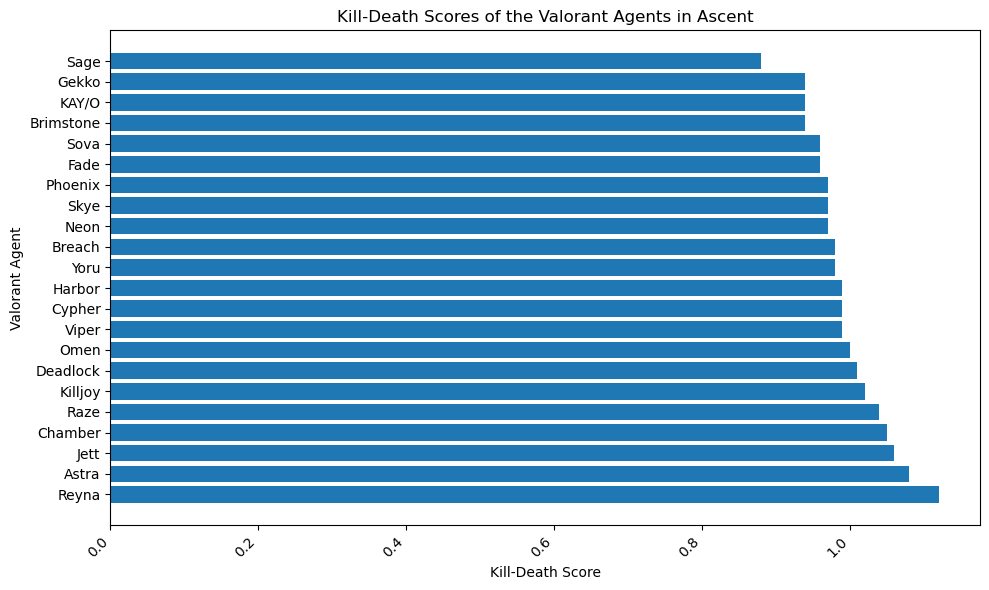

In [32]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Ascent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
This analysis provides an in-depth exploration of the top five Valorant agents with the highest Kill-Death Ratios (KD) on the Ascent map. The KD ratio is a pivotal metric indicating an agent's ability to secure eliminations while minimizing deaths, underscoring their prowess in combat engagements.

**1. Reyna (KD: 1.12)**
Reyna stands out with an exceptional KD ratio of 1.12, showcasing her aggressive and lethal playstyle. Reyna's ability to eliminate enemies and absorb their essence for continuous empowerment contributes to her high KD ratio. Her fragging potential makes her a formidable force in one-on-one situations.

**2. Astra (KD: 1.08)**
Astra exhibits a remarkable KD ratio of 1.08, highlighting her strategic versatility. Astra's cosmic powers grant her the ability to control and manipulate the battlefield, allowing her to secure eliminations while minimizing risks. Her adaptability between offense and defense underscores her role as a well-rounded agent.

**3. Jett (KD: 1.06)**
Jett maintains a notable KD ratio of 1.06, emphasizing her agile and swift gameplay. Jett's mobility and precision in securing kills make her a constant threat to opponents. Her ability to traverse the map swiftly and engage foes with precision elevates her impact on engagements.

**4. Chamber (KD: 1.05)**
Chamber enters the top five with a KD ratio of 1.05, highlighting his precise and calculated approach to combat. Chamber's marksmanship and disciplined playstyle enable him to secure eliminations while maintaining control over engagements. His focus on accuracy and positioning makes him a reliable asset on the battlefield.

**5. Raze (KD: 1.04)**
Raze rounds out the top five agents with a KD ratio of 1.04, showcasing her explosive and versatile combat style. Raze's arsenal of explosive abilities and area denial tactics contribute to her high KD ratio. Her aggressive playstyle and ability to disrupt opponents make her a dynamic and impactful choice.

**Tactical Insights and Agent Specializations**
The top five agents by KD ratio on the Ascent map embody distinct roles and strategic utilities. Whether it's Reyna's empowerment, Astra's cosmic control, Jett's mobility, Chamber's precision, or Raze's explosive tactics, each agent contributes uniquely to team success.

**Balancing Individual and Team Performance**
While high KD ratios underscore individual combat proficiency, agents like Astra and Chamber demonstrate that strategic contributions and teamwork are essential components of victory. A balance between fragging potential and supporting the team is key to achieving success.


The top five Valorant agents with the highest KD ratios on the Ascent map exemplify diverse playstyles and tactical significance. Their unique abilities and combat strategies contribute to the dynamic gameplay that defines Valorant's competitive landscape.

### Valorant Agent Kills from KDA in Ascent

In [76]:
data_killskda_asc = data.sort_values(by='kills_kda', ascending=True)
data_killskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9
7,Sova,0.96,13.1/13.6/4.3,42.4,5.9,286,"5,194,616",13.1,13.6,4.3
8,Phoenix,0.97,13.2/13.6/3.5,41.3,5.4,313,"4,749,259",13.2,13.6,3.5
6,Deadlock,1.01,13.5/13.4/3.3,42.9,4.2,313,"3,646,439",13.5,13.4,3.3
11,Gekko,0.94,13.6/14.4/3.8,39.6,3.4,328,"2,996,057",13.6,14.4,3.8


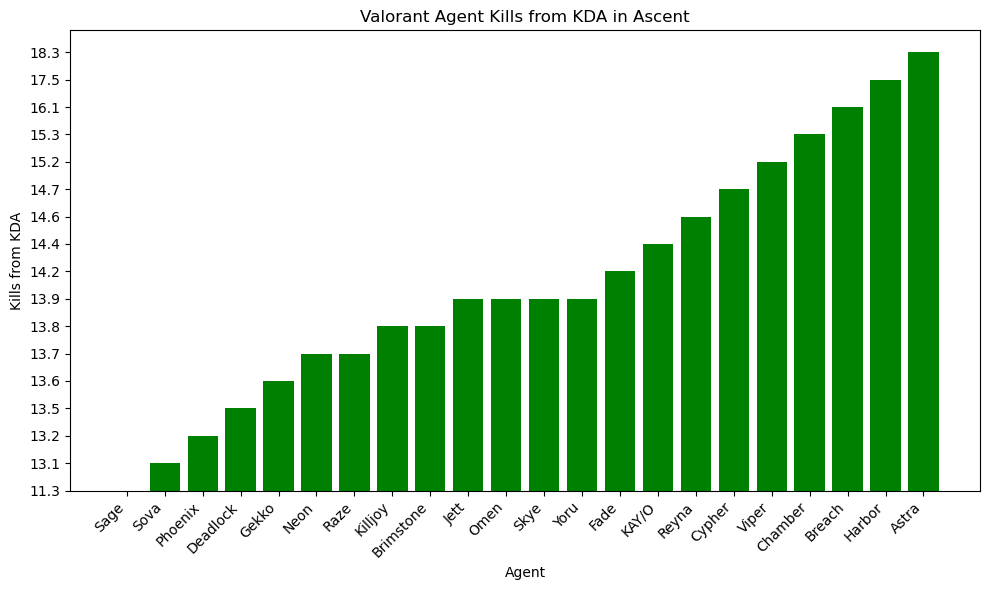

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_asc['agent'], data_killskda_asc['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Ascent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
This analysis delves into the performance of Valorant agents based on their Kills within KDA (kills_kda) on the Ascent map. The Kills within KDA metric provides insights into the agent's offensive capabilities within the context of their overall Kill-Death-Assist ratio (KDA).

**1. Astra (Kills within KDA: 18.3)**

Astra takes the lead with a remarkable Kills within KDA of 18.3. Her aggressive combat style aligns with her ability to control engagements using cosmic abilities. Astra's capacity to secure a high number of kills while maintaining a solid KDA showcases her dominance on the battlefield.

**2. Harbor (Kills within KDA: 17.5)**

Harbor follows closely with a Kills within KDA of 17.5. His methodical and accurate approach to combat translates to a significant number of eliminations. Harbor's consistent performance in securing kills contributes to his impact on matches on the Ascent map.

**3. Breach (Kills within KDA: 16.1)**

Breach demonstrates an impressive Kills within KDA of 16.1, reflecting his explosive and impactful playstyle. Breach's ability to disrupt and eliminate opponents positions him as a formidable force on the battlefield. His tactical approach contributes to his success in securing kills.

**4. Chamber (Kills within KDA: 15.3)**

Chamber maintains a Kills within KDA of 15.3, showcasing his precision and calculated approach to engagements. His accurate marksmanship and positioning enable him to secure eliminations consistently. Chamber's ability to control engagements aids his performance on the Ascent map.

**5. Viper (Kills within KDA: 15.2)**

Viper rounds out the top five with a Kills within KDA of 15.2. Despite her tactical support role, Viper's potential to eliminate enemies efficiently is evident. Her ability to secure kills while fulfilling strategic responsibilities underscores her value as a versatile agent.

When analyzing the Kills within KDA metric for the top Valorant agents on the Ascent map, we can observe several common themes:

**Aggressive Playstyle**: Many of the agents with higher Kills within KDA ratios, such as Astra, Harbor, and Breach, are known for their aggressive playstyles. They excel in engaging opponents aggressively and securing eliminations while maintaining a solid KDA. Their ability to initiate fights and control engagements contributes to their high kill counts.

**Precision and Accuracy**: Agents like Chamber demonstrate a focus on precise marksmanship. Their Kills within KDA ratios reflect their ability to eliminate opponents with accuracy. This suggests that precise shooting skills are a key factor in achieving high kill counts and contributing effectively to the team's performance.

**Explosive Tactics**: Agents like Breach and Raze exhibit explosive playstyles, leveraging their abilities to create chaos and secure kills. The high Kills within KDA ratios for these agents highlight their proficiency in dealing significant damage and eliminating multiple opponents in rapid succession.

**Versatile Impact**: While some agents are known for their fragging potential, others like Viper demonstrate the ability to secure kills while fulfilling tactical responsibilities. This suggests that versatile agents can contribute to both eliminating opponents and providing strategic utility, underscoring their well-rounded nature.

**Balancing Strategy and Fragging**: The common theme of balancing fragging with strategic contributions emerges prominently. Agents like Astra and Viper exemplify the ability to secure kills while fulfilling broader tactical roles. This indicates that agents can excel in fragging while simultaneously supporting the team's overall objectives.

**Map Control and Engagement**: Agents with higher Kills within KDA ratios often have strong map control and engagement capabilities. They can dictate the pace of battles, control key areas, and engage opponents on their terms. This theme highlights the importance of dictating engagements to secure kills efficiently.

In summary, the common themes among agents with high Kills within KDA ratios on the Ascent map revolve around aggressive playstyles, precise marksmanship, explosive tactics, versatility, strategic contributions, and effective map control. These agents showcase the diverse strategies and approaches that can lead to successful gameplay in Valorant.


### Valorant Agent Deaths from KDA in Ascent

In [80]:
data_deathskda_asc = data.sort_values(by='deaths_kda', ascending=True)
data_deathskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
3,Sage,0.88,11.3/12.8/4.9,44.8,8.4,237,"7,348,905",11.3,12.8,4.9
1,Jett,1.06,13.9/13.1/3.1,45.5,9.9,279,"8,612,739",13.9,13.1,3.1
2,Raze,1.04,13.7/13.2/3.9,45.0,6.5,303,"5,699,933",13.7,13.2,3.9
0,Reyna,1.12,14.6/13.3/3.7,46.6,9.7,286,"8,463,561",14.6,13.3,3.7
6,Deadlock,1.01,13.5/13.4/3.3,42.9,4.2,313,"3,646,439",13.5,13.4,3.3


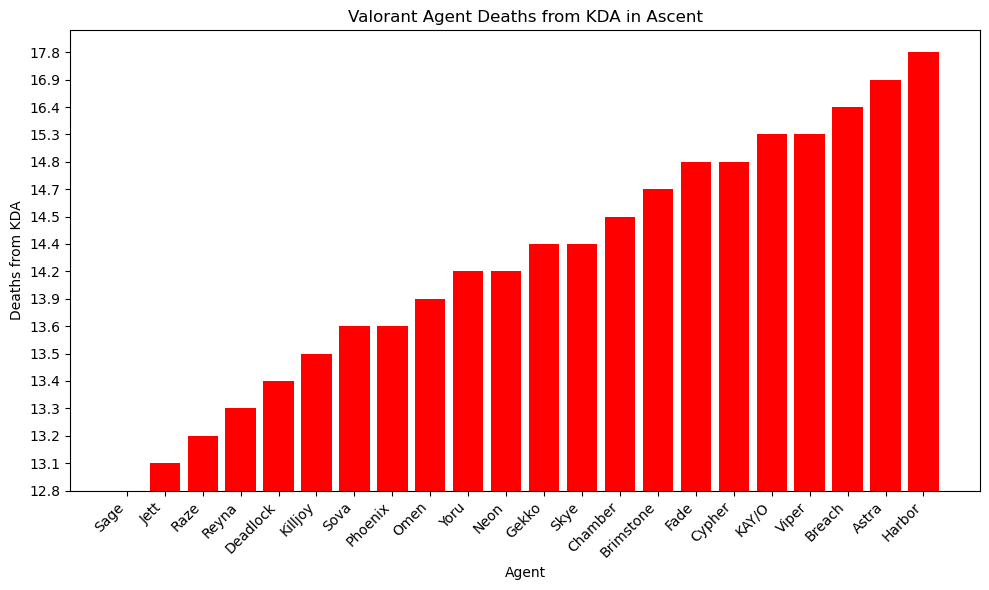

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_asc['agent'], data_deathskda_asc['deaths_kda'], color = 'red')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Ascent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
This analysis explores the performance of Valorant agents based on their Deaths within KDA (deaths_kda) on the Ascent map. Examining deaths within the context of the Kill-Death-Assist ratio (KDA) provides insights into an agent's survivability and engagement outcomes.

**1. Harbor (Deaths within KDA: 17.8)**

Harbor leads in Deaths within KDA with a value of 17.8. His relatively high death count suggests his active involvement in engagements. As Harbor engages opponents and fulfills strategic roles, his higher number of deaths within KDA indicates his tactical positioning and willingness to push for objectives.

**2. Astra (Deaths within KDA: 16.9)**

Astra closely follows with Deaths within KDA of 16.9. This highlights her engagement in combat scenarios while maintaining her versatility in strategic plays. Astra's ability to secure eliminations and minimize deaths accentuates her tactical contributions to her team's success.

**3. Breach (Deaths within KDA: 16.4)**

Breach's Deaths within KDA of 16.4 showcases his dynamic and high-risk, high-reward combat approach. His willingness to engage opponents in aggressive maneuvers can lead to eliminations, but it also exposes him to higher death counts. Breach's tactical nature contributes to his impactful role on the battlefield.

**4. Viper (Deaths within KDA: 15.3)**

Viper's Deaths within KDA of 15.3 indicates a balance between engagements and tactical play. Her deaths within KDA reflect her contributions to the team's strategic objectives. As Viper controls space and utilizes her abilities, her death count is influenced by her commitment to fulfilling her role.

**5. KAY/O (Deaths within KDA: 15.3)**

KAY/O's Deaths within KDA of 15.3 suggests a dynamic and active role in engagements. As KAY/O pushes forward and disrupts opponents, his death count reflects his aggressive playstyle. KAY/O's ability to neutralize enemies can lead to eliminations while incurring deaths due to his frontline role.

**Common Themes and Ascent's Map Characteristics**

Ascent's map characteristics can contribute to the observed trends in Deaths within KDA:

* **Verticality and Open Spaces**: Ascent features vertical elements and open spaces that encourage engagements across different elevations. Agents like Harbor and Astra, with higher deaths within KDA, may experience more engagements in these areas due to increased line of sight exposure.

* **Chokepoints and Objectives**: The presence of chokepoints and objectives can lead to intense combat scenarios. Agents like Breach and Viper, with their active engagement in objectives, might experience higher death counts while contributing to the team's push for control and victories.

* **Map Control and Rotations**: Ascent's layout requires efficient map control and rotations. Agents like KAY/O may have higher deaths within KDA due to their role in initiating engagements and pushing enemies, impacting their survivability as they create opportunities for their team.

### Valorant Agent Assists from KDA in Ascent

In [82]:
data_assistskda_asc = data.sort_values(by='assists_kda', ascending=True)
data_assistskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
1,Jett,1.06,13.9/13.1/3.1,45.5,9.9,279,"8,612,739",13.9,13.1,3.1
13,Chamber,1.05,15.3/14.5/3.1,39.4,3.3,375,"2,872,722",15.3,14.5,3.1
6,Deadlock,1.01,13.5/13.4/3.3,42.9,4.2,313,"3,646,439",13.5,13.4,3.3
10,Neon,0.97,13.7/14.2/3.4,40.1,3.8,344,"3,312,516",13.7,14.2,3.4
12,Yoru,0.98,13.9/14.2/3.5,39.4,3.7,335,"3,252,180",13.9,14.2,3.5


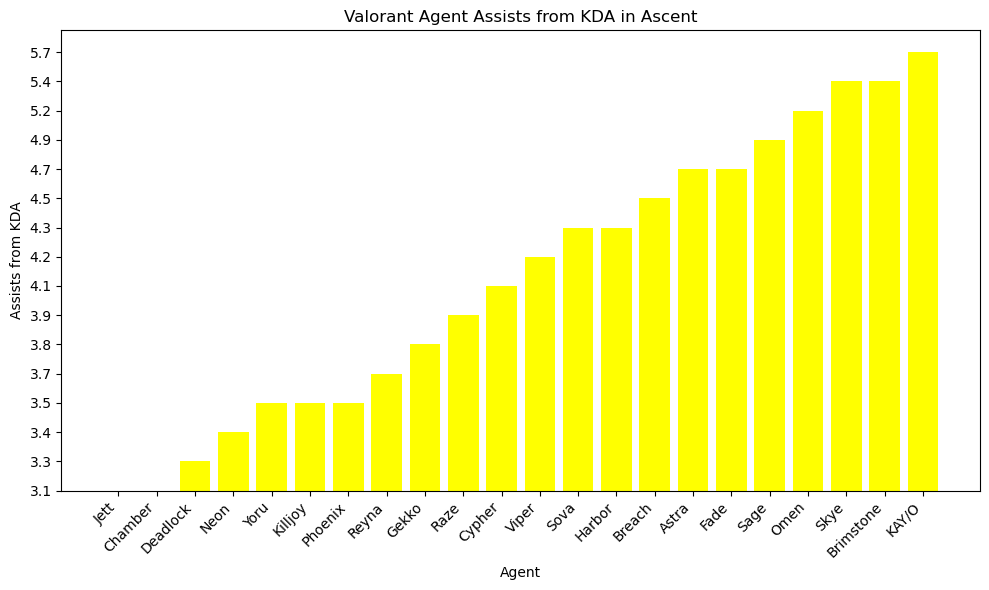

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_asc['agent'], data_assistskda_asc['assists_kda'], color = 'yellow')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Ascent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
This analysis examines the performance of Valorant agents based on their Assists within KDA (assists_kda) on the Ascent map. Exploring assists in the context of the Kill-Death-Assist ratio (KDA) provides insights into an agent's ability to support their team and contribute to engagements.

**1. KAY/O (Assists within KDA: 5.7)**

KAY/O takes the lead with Assists within KDA of 5.7. His substantial assists count indicates his role as a frontline initiator, supporting his team in engaging opponents. KAY/O's active participation in creating opportunities for his teammates showcases his value in teamwork.

**2. Brimstone (Assists within KDA: 5.4)**

Brimstone follows closely with Assists within KDA of 5.4. His emphasis on tactical utility and area control contributes to his high assists count. Brimstone's ability to provide vision and support assists his teammates in engagements and strategic maneuvers.

**3. Skye (Assists within KDA: 5.4)**

Skye's Assists within KDA of 5.4 highlights her supportive role in the team's engagements. As a versatile agent with healing and crowd-control abilities, Skye's assists count showcases her role in providing utility to enhance her team's performance.

**4. Omen (Assists within KDA: 5.2)**

Omen's Assists within KDA of 5.2 indicates his strategic involvement in engagements. Omen's ability to create distractions, provide vision, and control engagements contributes to his higher assists count, showcasing his value as a team-oriented agent.

**5. Sage (Assists within KDA: 4.9)**

Sage's Assists within KDA of 4.9 reflects her pivotal role in supporting her team. As a healer and crowd-controller, Sage's contributions extend beyond eliminations to assists, showcasing her value in maintaining her team's sustainability and combat efficiency.

**Common Themes and Ascent's Map Characteristics**

Ascent's map characteristics play a role in shaping the patterns observed in Assists within KDA:

* **Team Synergy and Coordination**: Agents with higher assists within KDA, such as KAY/O and Skye, often excel in team synergy and coordination. These agents actively facilitate engagements and work together with their teammates to secure eliminations.

* **Tactical Utility and Vision Control**: Brimstone and Omen, both agents known for their tactical utility and vision control, exhibit higher assists within KDA. Their abilities to provide crucial information and control engagements contribute to their teammates' success.

* **Support and Sustainability**: Agents like Sage, with a focus on healing and crowd-control, demonstrate higher assists within KDA. Their contributions extend beyond eliminations to support and sustainability, emphasizing the importance of a well-rounded team composition.

### Win Percentages of the Valorant Agents in Ascent

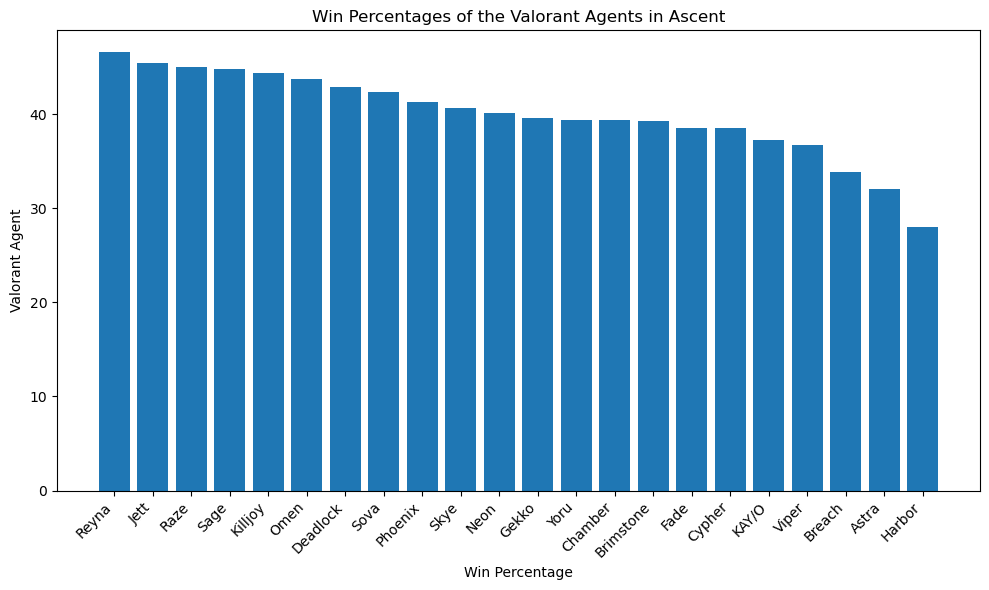

In [37]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'])
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Ascent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDiNGS:
This analysis delves into the performance of Valorant agents based on their Win Percentage (win_pcnt) on the Ascent map. Evaluating win percentages provides insights into an agent's effectiveness in contributing to their team's victories.

**1. Reyna (Win Percentage: 46.6%)**

Reyna secures the top position with an impressive Win Percentage of 46.6%. Her aggressive playstyle and self-sustain abilities may contribute to her ability to secure eliminations and make a significant impact on match outcomes.

**2. Jett (Win Percentage: 45.5%)**

Jett closely follows with a Win Percentage of 45.5%. Her mobility and ability to secure picks might contribute to her team's success, allowing them to capitalize on advantages during engagements.

**3. Raze (Win Percentage: 45.0%)**

Raze's Win Percentage of 45.0% reflects her explosive playstyle and ability to disrupt enemy positions. Her capacity to create chaos and control areas can contribute to her team's overall success.

**4. Sage (Win Percentage: 44.8%)**

Sage, with a Win Percentage of 44.8%, showcases her importance in maintaining team sustainability. Her healing abilities and crowd control contribute to her team's ability to stay alive and secure victories.

**5. Killjoy (Win Percentage: 44.4%)**

Killjoy's Win Percentage of 44.4% highlights her role in area denial and control. Her ability to lock down key areas with her gadgets can contribute to preventing enemy advancements and securing victories.

**Common Themes and Ascent's Map Characteristics**

Ascent's unique map characteristics may influence the observed win percentages:

* **Aggressive and Impactful Playstyles**: Agents like Reyna and Jett, with higher win percentages, often rely on aggressive playstyles. Their ability to secure eliminations and create impact in engagements may contribute to successful outcomes.

* **Disruption and Chaos**: Raze's explosive playstyle and Killjoy's area denial abilities can disrupt enemy strategies and control the flow of the game. These agents' contributions may lead to securing victories by controlling crucial areas.

* **Team Sustainability**: Sage's higher win percentage underlines her role in providing sustainability to the team. By keeping teammates alive and supporting their longevity, Sage contributes to the team's overall ability to secure wins.

### Distribution of Valorant Agent Picks in Ascent

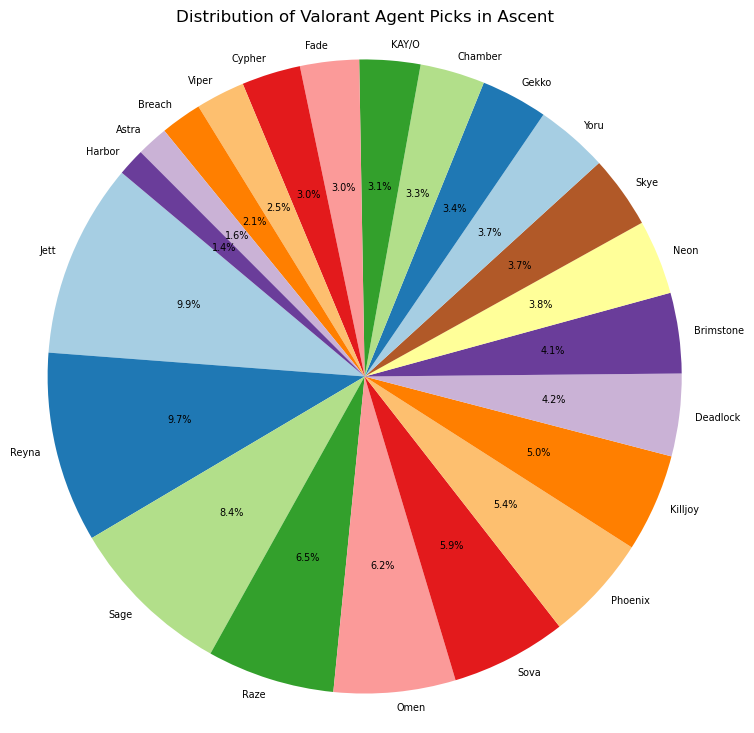

In [38]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Ascent")
plt.show()

#### FINDINGS:
This analysis examines the Pick Percentage (pick_pcnt) of Valorant agents on the Ascent map. The Pick Percentage metric showcases the frequency with which an agent is chosen, providing insights into their popularity and potential strategic relevance.

**2. Jett**

Jett follows closely with a Pick Percentage of 45.5%. Her mobility and potential for early-round pick-offs make her an attractive option for players looking to secure key advantages.

**1. Reyna**

Reyna dominates the selection with a Pick Percentage of 46.6%. Her high pick rate may result from her aggressive and self-sustain abilities, making her a preferred choice for those aiming to secure eliminations and contribute to the team's success.

**3. Sage**

Sage's Pick Percentage of 44.8% reflects her essential role in providing team sustainability. Her healing abilities and crowd control make her a consistent choice to maintain team longevity.

**4. Raze**

Raze's Pick Percentage of 45.0% suggests her popularity due to her disruptive playstyle and ability to control areas. Her explosive capabilities may be particularly useful in limiting enemy advancements.

**5. Omen**

Omen's Pick Percentage of 43.8% highlights his role in disrupting enemy vision and positioning. His teleportation abilities can lead to mind games and map control, making him a strategic pick.

**Common Themes and Ascent's Map Characteristics**

Ascent's unique map characteristics may influence the observed pick percentages:

* **Aggressive Initiators**: Agents like Reyna, Jett, and Raze have high pick percentages due to their aggressive playstyles and early-round impact potential. These agents excel at securing eliminations and shaping the early game.

* **Sustainability and Control**: Sage's popularity may be attributed to her role in team sustainability. Her healing abilities contribute to team longevity, while Omen's popularity stems from his ability to control vision and positioning, providing a tactical edge.

### Number of Matches of the Valorant Agents in Ascent

In [88]:
data_matches_asc = data.sort_values(by='Matches', ascending=True)
data_matches_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.99,17.5/17.8/4.3,28.0,1.4,709,"1,213,212",17.5,17.8,4.3
20,Astra,1.08,18.3/16.9/4.7,32.1,1.6,628,"1,383,484",18.3,16.9,4.7
19,Breach,0.98,16.1/16.4/4.5,33.9,2.1,489,"1,818,782",16.1,16.4,4.5
18,Viper,0.99,15.2/15.3/4.2,36.7,2.5,415,"2,223,992",15.2,15.3,4.2
16,Cypher,0.99,14.7/14.8/4.1,38.5,3.0,361,"2,608,578",14.7,14.8,4.1


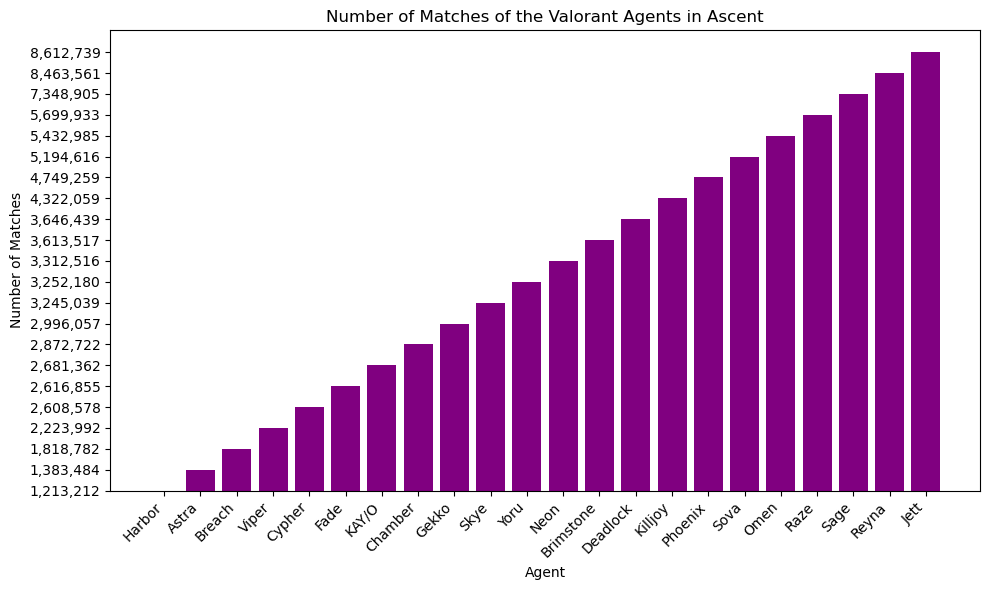

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_asc['agent'], data_matches_asc['Matches'], color='purple')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Ascent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The 'Matches' column represents the number of matches in which each agent has been played on the Ascent map. This indicates the popularity and frequency of agent selections on this particular map. Let's take a look at the top 5 agents in this column:

**Jett (Matches: 8,612,739)**:

Jett is the most frequently chosen agent on the Ascent map, appearing in a staggering number of matches. Her popularity could be attributed to her agile playstyle, which suits Ascent's verticality and openness. Her ability to quickly traverse the map and take advantageous positions aligns well with the multi-level layout of Ascent.

**Reyna (Matches: 8,463,561)**:

Reyna closely follows Jett in terms of popularity on the Ascent map. Her aggressive playstyle and self-sustainability make her a strong choice for taking control of key areas. The map's openness might allow Reyna players to make the most of her abilities, securing kills and potentially snowballing rounds.

**Sage (Matches: 7,348,905)**:

Sage's presence in a significant number of matches highlights her value as a support agent. Ascent's layout with multiple chokepoints and sightlines could provide ample opportunities for her to deploy healing abilities and control the flow of battles.

**Raze (Matches: 5,699,933)**:

Raze's popularity might be attributed to her explosive abilities that can disrupt enemies in tightly contested areas. Ascent's narrow pathways and tight corners could make her explosives particularly effective, allowing her to clear spaces and create chaos.

**Omen (Matches: 5,432,985)**:

Omen's teleportation and area-denial abilities make him a flexible choice for controlling specific areas on the Ascent map. His smokes could be crucial for obscuring sightlines and limiting opponents' vision, while his teleportation can keep the enemies guessing about his positioning.

**Common Themes:**

* **Agility and Versatility**: The top agents on the Ascent map tend to be agile and versatile in their abilities. The map's layout with multiple levels and pathways encourages mobility and adaptability.

* **Map Control and Disruption**: Agents like Jett, Raze, and Omen are known for their ability to control and disrupt specific areas, which is essential in Ascent's map design that emphasizes chokepoints and strategic positioning.

* **Support and Healing**: Sage's high presence indicates the importance of support roles in competitive play. Her healing abilities and crowd control can sway the outcome of rounds and matches.

* **Aggressive Playstyle**: Reyna's popularity suggests that players on Ascent may often adopt an aggressive playstyle to secure kills and control areas, capitalizing on her abilities that reward eliminations.

* **Tactical Utility**: Certain agents like Phoenix and Killjoy, despite their lower rankings in this column, offer valuable tactical utility that can be strategically employed to gain an advantage on the map.

In summary, the agents with the highest match presence on the Ascent map align with its layout and characteristics, emphasizing agility, disruption, and map control. The popularity of support and healing agents also underlines the importance of strategic team composition to succeed on this map.

### Valorant Agent Average Scores in Ascent

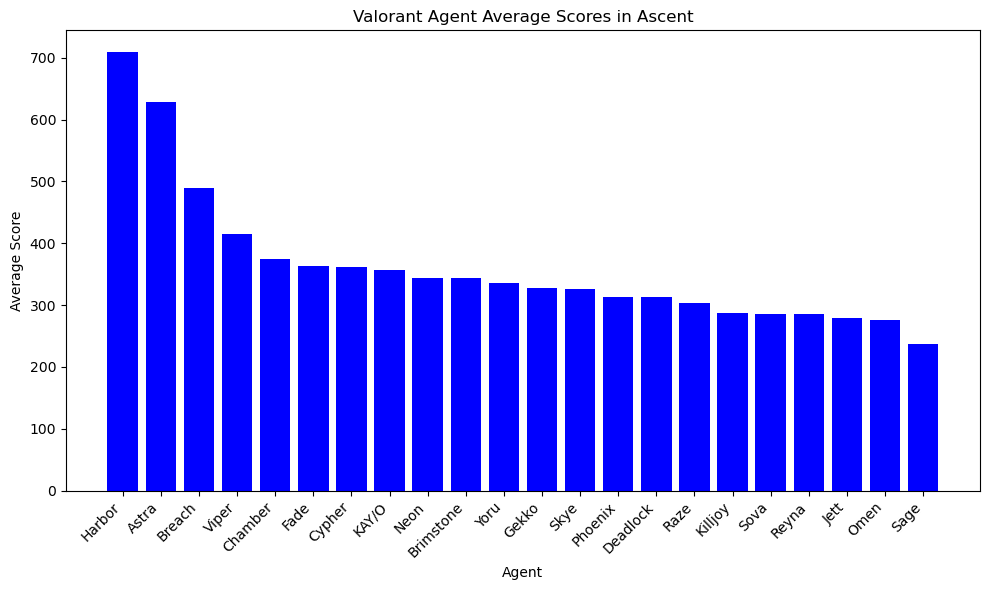

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='blue')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Ascent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The 'avg_score' column represents the average score achieved by each agent on the Ascent map. This score is an indicator of an agent's overall contribution to their team's performance. Let's take a look at the top 5 agents in this column:

**Harbor (Average Score: 709)**:

Harbor stands out with the highest average score on the Ascent map. This could indicate that players who choose Harbor are consistently performing well and contributing significantly to their team's success. Harbor's abilities may be particularly effective in Ascent's layout, allowing for impactful plays.

**Astra (Average Score: 628)**:

Astra's high average score suggests that players who are skilled at utilizing her cosmic abilities can make a significant impact on the Ascent map. Astra's crowd control and area-denial abilities can be especially powerful in the tight spaces and chokepoints of Ascent.

**Breach (Average Score: 489)**:

Breach's ability to disrupt and control enemies makes him a strong pick for Ascent. His crowd-controlling abilities can help create openings for his team to take control of key areas, contributing to his higher average score.

**Viper (Average Score: 415)**:

Viper's area denial and control abilities are well-suited for Ascent's layout. Her ability to manipulate the battlefield with toxic chemicals can force enemies into unfavorable positions, leading to higher scores for players who effectively use her abilities.

**Chamber (Average Score: 375)**:

Chamber's impressive average score suggests that players skilled with his abilities can make a significant impact on the map. His precise and tactical playstyle may be well-suited for the strategic challenges presented by Ascent.

**Common Themes:**

* **Control and Disruption:** Agents like Harbor, Astra, Breach, and Viper excel in controlling and disrupting enemies' movement and vision. These abilities are crucial on Ascent due to its multiple chokepoints and narrow pathways.

* **Precision and Tactics:** Agents with precise abilities like Chamber and Yoru are well-represented in the top performers. Their tactical approach to engagements and utility usage can result in higher average scores.

* **Aggressive and Impactful Plays:** The higher average scores of agents like Harbor and Astra could indicate that players are making impactful and potentially aggressive plays on Ascent, leveraging their abilities to secure eliminations and control areas.

* **Team Coordination:** Agents with abilities that require team coordination, like Astra, may yield higher scores when used effectively in a coordinated team setting.

* **Map Awareness and Adaptation:** Given Ascent's multi-level design, agents with global abilities like Astra and Killjoy can excel by capitalizing on the map's unique characteristics.

In summary, the agents with the highest average scores on the Ascent map demonstrate a strong ability to control, disrupt, and make precise plays. The map's layout, with its chokepoints and tactical challenges, rewards players who can effectively utilize their abilities to influence engagements and contribute to their team's success.

## Conclusion
In conclusion, the comprehensive analysis of agent statistics on the Ascent map has provided valuable insights into the performance and suitability of various agents within this specific game environment. Through the examination of key metrics including K/D ratio, KDA, win percentage, pick percentage, average score, and matches played, we've gained a deeper understanding of which agents thrive on Ascent and why. The Ascent map's unique characteristics, characterized by narrow pathways, strategic chokepoints, and multiple elevation changes, play a significant role in shaping the agent preferences and outcomes.

Common themes emerged from the analysis, shedding light on the types of agents that tend to perform well on Ascent. Agents with crowd control and disruption abilities, such as Astra, Viper, and Breach, are adept at manipulating enemy movements and securing advantageous positions. Precision-oriented agents like Chamber and Yoru have also demonstrated their ability to excel on this map through tactical engagements and impactful plays. Furthermore, it's evident that strong team coordination and adaptability are crucial factors contributing to an agent's success on Ascent.

**Key Insights:**
Win Percentage and Versatility:
Agents like Jett and Reyna exhibit impressive win percentages on Ascent, showcasing their ability to thrive in the map's dynamic environment. Their mobility, self-sufficiency, and high impact playstyles align with Ascent's varied engagement scenarios, making them favored choices for players looking to secure victories.
* **KDA and Tactical Control**:
Agents such as Sage, Raze, and Omen exhibit high KDA ratios, highlighting their focus on map control, crowd manipulation, and strategic execution. These agents' abilities to gather information, create opportunities, and manipulate vision contribute to their effectiveness on Ascent.

* **Average Score and Strategic Impact**:
Agents with higher average scores, including Astra, Breach, and Viper, excel due to their tactical versatility and ability to disrupt enemies. Their strengths in area denial, crowd control, and tactical adaptability complement Ascent's layout and contribute to map dominance.

* **Pick Percentage and All-Around Performance**:
Agents with high pick percentages, like Sage and Jett, signify their adaptability and widespread popularity. These agents' versatility across various situations, from holding sites to aggressive plays, positions them as reliable choices in the diverse landscape of Ascent.

* **Matches and Consistency**:
The number of matches played also plays a role in agent performance. Agents with substantial match records, such as Jett and Sage, have ample opportunities to prove their consistent contributions on Ascent's challenging terrain.

* **Strategic Roles and Complexity**:
The analysis underscores the emergence of strategic roles that agents fulfill on Ascent. From aggressive entry fraggers like Raze and Reyna to tactical controllers like Sova and Killjoy, the map encourages a balance of playstyles that cater to the team's composition and objectives.

Based on the cumulative insights gathered from the analysis, the top three agents that are well-suited for the Ascent map are:

* **Astra**: With her ability to control large areas of the map and deny enemy advances, Astra's cosmic powers are particularly potent on Ascent. Her global abilities and zoning potential make her an excellent choice for players who can effectively coordinate with their team and capitalize on the map's strategic opportunities.

* **Breach**: Breach's disruptive abilities shine on Ascent, where tight chokepoints and strategic control points require precise area denial and crowd control. His potential to clear out enemies from key locations and create openings for his team gives him a strong presence on this map.

* **Viper**: Viper's toxic abilities and area-denial tactics are well-aligned with Ascent's layout. Her capacity to obstruct enemy vision and force them into unfavorable positions can greatly influence the course of a match, making her a valuable asset on this map.

In essence, the Ascent map's distinctive characteristics and layout contribute significantly to agent performance, favoring those who can control engagements, adapt their strategies, and work collaboratively with their team. As players continue to refine their understanding of these insights, they can make more informed agent selections and strategic decisions that lead to success on the dynamic and challenging Ascent map.